Merged static_client_data with time_series_data and performed one-hot encoding

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MultiLabelBinarizer

# Load datasets
static_df = pd.read_csv("/Users/isha/Datathon/venv/static_client_data.csv")
time_series_df = pd.read_csv("/Users/isha/Datathon/venv/time_series_data.csv")
target_df = pd.read_csv("/Users/isha/Datathon/venv/target_data.csv")

# Convert preferred_asset_classes to lists (if stored as strings)
static_df["preferred_asset_classes"] = static_df["preferred_asset_classes"].apply(lambda x: eval(x) if isinstance(x, str) else x)

# One-Hot Encode categorical columns
one_hot_cols = ["gender", "employment_status", "investment_goals"]
one_hot_encoder = OneHotEncoder(drop="first", sparse_output=False)
one_hot_encoded = one_hot_encoder.fit_transform(static_df[one_hot_cols])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(one_hot_cols))

# Label Encode risk_appetite
label_encoder = LabelEncoder()
static_df["risk_appetite_encoded"] = label_encoder.fit_transform(static_df["risk_appetite"])

# Multi-Hot Encode preferred_asset_classes
mlb = MultiLabelBinarizer()
multi_hot_encoded = mlb.fit_transform(static_df["preferred_asset_classes"])
multi_hot_df = pd.DataFrame(multi_hot_encoded, columns=[f"asset_{cls}" for cls in mlb.classes_])

# Drop original categorical columns and concatenate encoded features
static_df.drop(columns=one_hot_cols + ["risk_appetite", "preferred_asset_classes"], inplace=True)
static_df = pd.concat([static_df, one_hot_df, multi_hot_df], axis=1)

# Merge with time-series data (preserving all time-series rows)
merged_df = time_series_df.merge(static_df, on="client_id", how="left")

# Merge with target data (ONLY forecasted values for Task 2)
target_columns = ["client_id", "forecasted_value_year_1", "forecasted_value_year_2", "forecasted_value_year_3"]
target_df = target_df[target_columns]

# Merge target values
merged_df = merged_df.merge(target_df, on="client_id", how="left")

# Save processed dataset
merged_df.to_csv("/Users/isha/Datathon/static_time_series.csv", index=False)

print("✅ Encoding & Merging complete! Merged dataset shape:", merged_df.shape)


✅ Encoding & Merging complete! Merged dataset shape: (360000, 34)


Basic EDA 

In [8]:
print(merged_df.dtypes)


client_id                                object
month                                    object
portfolio_value                         float64
equity_allocation_pct                   float64
fixed_income_allocation_pct             float64
monthly_contribution                    float64
market_volatility_index                 float64
macroeconomic_score                     float64
sentiment_index                         float64
age                                       int64
annual_income                           float64
debt_to_income_ratio                    float64
financial_knowledge_score                 int64
investment_horizon_years                  int64
dependents                                int64
savings_rate                            float64
net_worth                               float64
risk_appetite_encoded                     int64
gender_Male                             float64
gender_Other                            float64
employment_status_Salaried              

In [9]:
display(merged_df.describe(include="all"))


,client_id,month,portfolio_value,equity_allocation_pct,fixed_income_allocation_pct,monthly_contribution,market_volatility_index,macroeconomic_score,sentiment_index,age,...,investment_goals_Retirement,investment_goals_Wealth Accumulation,asset_Bonds,asset_ETFs,asset_Mutual Funds,asset_Real Estate,asset_Stocks,forecasted_value_year_1,forecasted_value_year_2,forecasted_value_year_3
count,360000,360000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,...,360000.000000,360000.00000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000
unique,10000,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,96c4c0a3-bb3f-4ac1-81ad-0850cd29911f,2022-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,36,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,78262.271567,49.965284,50.034716,1249.821294,19.990502,5.498096,5.500109,44.490700,...,0.251500,0.24970,0.399800,0.409800,0.387600,0.401900,0.400900,48938.246671,82317.239596,116204.381637
std,NaN,NaN,29202.474845,17.320700,17.320700,432.683542,5.778624,1.442192,1.443517,11.424066,...,0.433876,0.43284,0.489858,0.491797,0.487203,0.490283,0.490081,26245.145847,30041.882463,25961.730578
min,NaN,NaN,10074.630000,20.000000,20.000000,500.000000,10.000000,3.000000,3.000000,25.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,15012.655804,15450.515123,24685.851647
25%,NaN,NaN,55724.795000,34.970000,35.040000,875.220000,14.980000,4.250000,4.250000,35.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,27142.041255,59274.774835,99650.635448
50%,NaN,NaN,78252.610000,49.950000,50.050000,1249.420000,19.990000,5.500000,5.500000,44.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43012.246489,82326.897448,121756.321296
75%,NaN,NaN,100711.267500,64.960000,65.030000,1624.250000,25.000000,6.740000,6.750000,54.000000,...,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,65429.238283,105276.484850,137675.492206


In [10]:
print(merged_df.isnull().sum())


client_id                               0
month                                   0
portfolio_value                         0
equity_allocation_pct                   0
fixed_income_allocation_pct             0
monthly_contribution                    0
market_volatility_index                 0
macroeconomic_score                     0
sentiment_index                         0
age                                     0
annual_income                           0
debt_to_income_ratio                    0
financial_knowledge_score               0
investment_horizon_years                0
dependents                              0
savings_rate                            0
net_worth                               0
risk_appetite_encoded                   0
gender_Male                             0
gender_Other                            0
employment_status_Salaried              0
employment_status_Self-Employed         0
employment_status_Unemployed            0
investment_goals_Home Purchase    

In [11]:
print(df.duplicated().sum())


0


Sorted values by month in anscending order for each client so that we can capture the time-series data better

In [12]:
df.sort_values(by=["client_id", "month"], inplace=True)


Average portfolio Trend over time for all clients seems to be increasing linearly

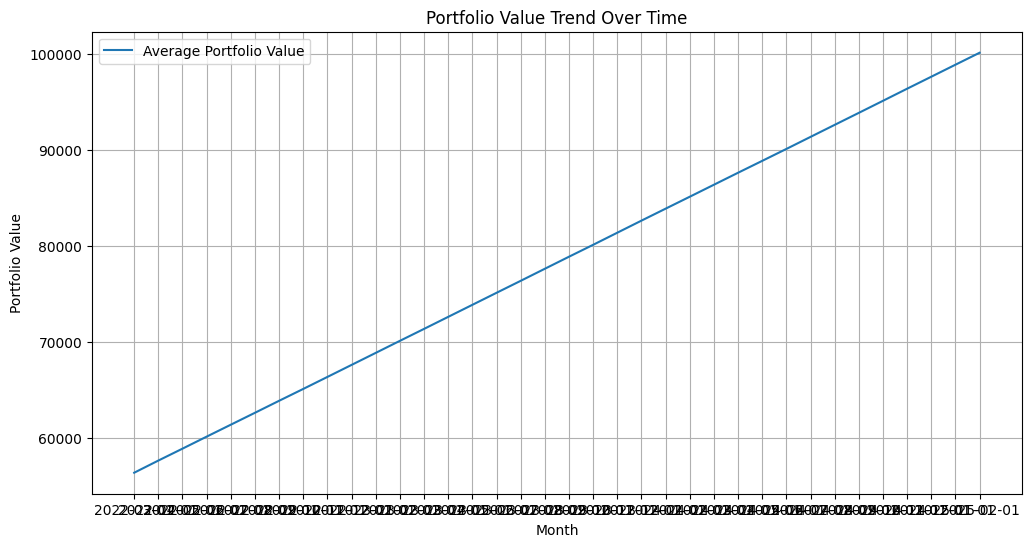

In [13]:
import matplotlib.pyplot as plt

df_grouped = df.groupby("month")["portfolio_value"].mean()
plt.figure(figsize=(12, 6))
plt.plot(df_grouped, label="Average Portfolio Value")
plt.title("Portfolio Value Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid()
plt.show()


POrtfolio trends for a random sample of 5 clients

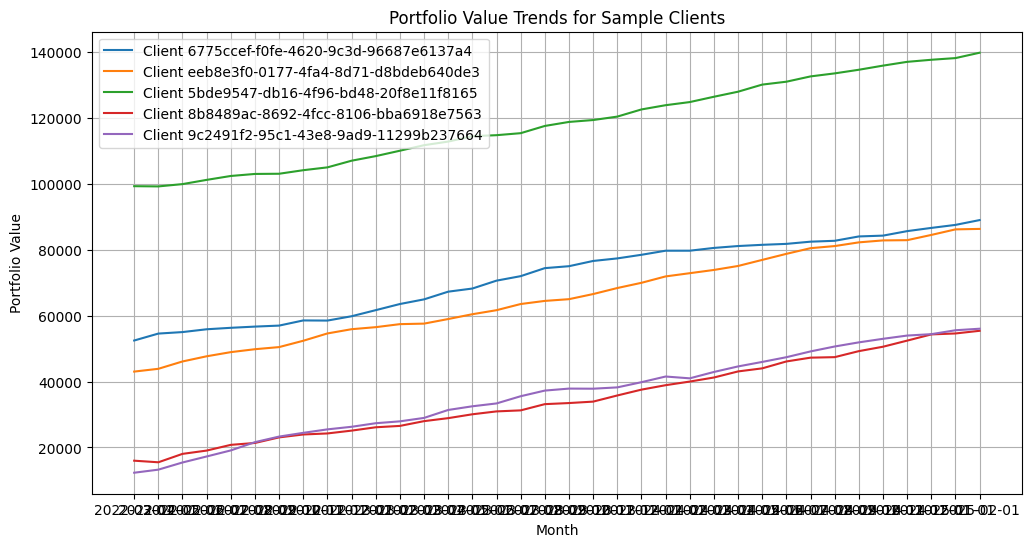

In [14]:
import random
random_clients = random.sample(list(df["client_id"].unique()), 5)

plt.figure(figsize=(12, 6))
for client in random_clients:
    client_data = df[df["client_id"] == client]
    plt.plot(client_data["month"], client_data["portfolio_value"], label=f"Client {client}")

plt.title("Portfolio Value Trends for Sample Clients")
plt.xlabel("Month")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid()
plt.show()


Decomposition

<Figure size 1200x800 with 0 Axes>

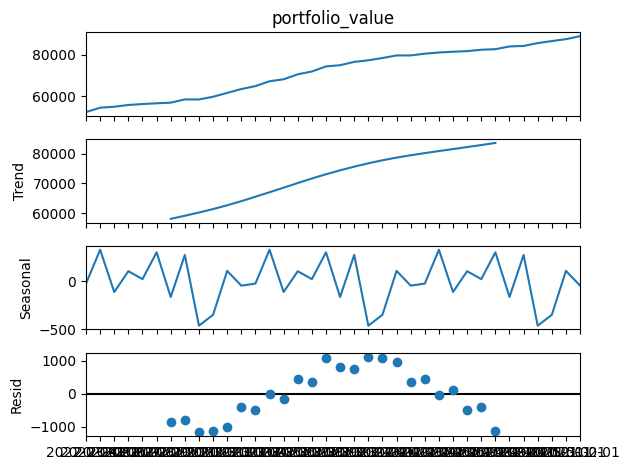

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

sample_client = df[df["client_id"] == random_clients[0]].set_index("month")["portfolio_value"]
decomposition = seasonal_decompose(sample_client, model="additive", period=12)

plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()


Autocorrelation

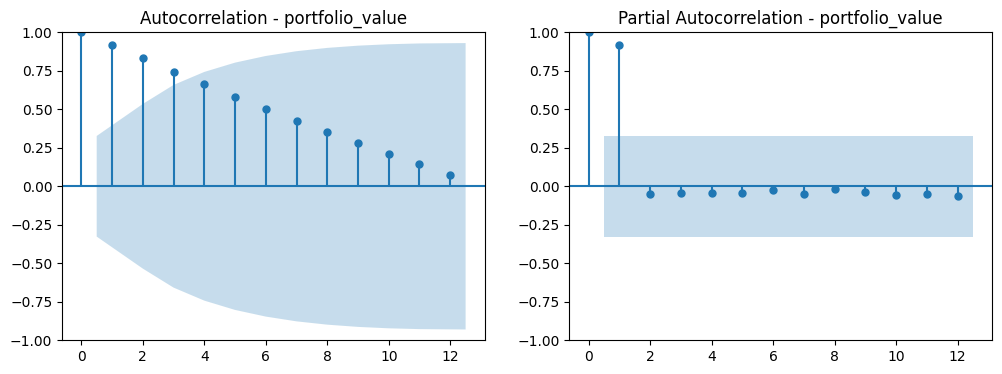

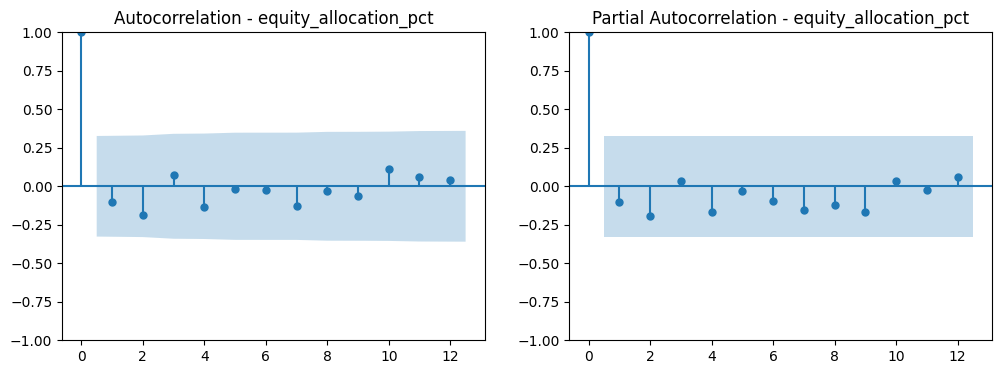

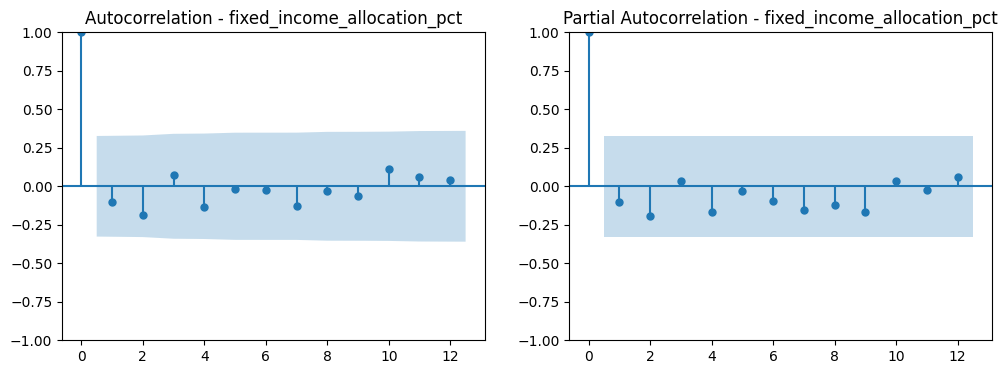

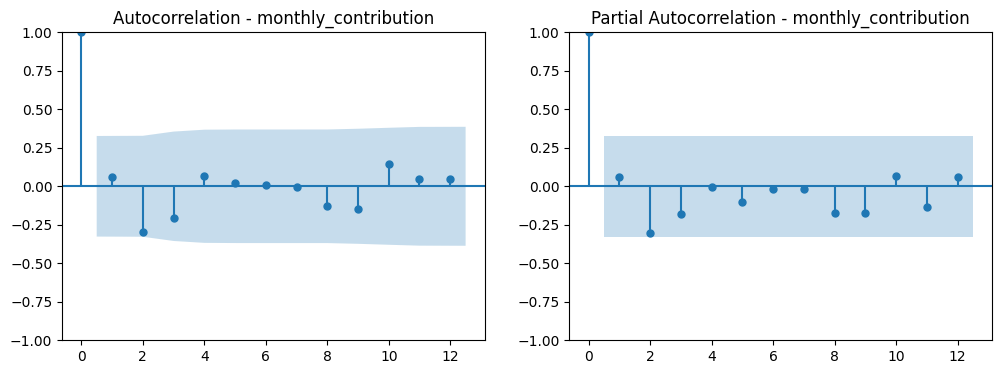

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv("/Users/isha/Datathon/static_time_series.csv")
df["month"] = pd.to_datetime(df["month"])

# Choose a sample client for visualization
sample_client = df[df["client_id"] == df["client_id"].iloc[0]]

# Features to analyze
features = ["portfolio_value", "equity_allocation_pct", "fixed_income_allocation_pct", "monthly_contribution"]

# Plot ACF and PACF for each feature
for feature in features:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    sm.graphics.tsa.plot_acf(sample_client[feature].dropna(), ax=axes[0], lags=12)
    axes[0].set_title(f"Autocorrelation - {feature}")
    
    sm.graphics.tsa.plot_pacf(sample_client[feature].dropna(), ax=axes[1], lags=12)
    axes[1].set_title(f"Partial Autocorrelation - {feature}")
    
    plt.show()


Stationarity check

In [26]:
from statsmodels.tsa.stattools import adfuller

# Function to check stationarity
def check_stationarity(series, feature_name):
    result = adfuller(series.dropna())
    print(f"ADF Test for {feature_name}")
    print(f"Test Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] < 0.05:
        print("✅ Stationary (Good for lagging)")
    else:
        print("❌ Non-stationary (Consider differencing)")
    print("-" * 40)

# Run test for each feature
for feature in features:
    check_stationarity(sample_client[feature], feature)


ADF Test for portfolio_value
Test Statistic: 0.8486630009278061
p-value: 0.9923824249442389
❌ Non-stationary (Consider differencing)
----------------------------------------
ADF Test for equity_allocation_pct
Test Statistic: -6.350994750156611
p-value: 2.6111836627318067e-08
✅ Stationary (Good for lagging)
----------------------------------------
ADF Test for fixed_income_allocation_pct
Test Statistic: -6.350994750156609
p-value: 2.6111836627318305e-08
✅ Stationary (Good for lagging)
----------------------------------------
ADF Test for monthly_contribution
Test Statistic: -4.36356392765762
p-value: 0.0003441468273027808
✅ Stationary (Good for lagging)
----------------------------------------


As this reduces effect of temporal features, Check stationarity for each client and feature

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv("/Users/isha/Datathon/static_time_series.csv")

time_features = [
    'portfolio_value', 
    'equity_allocation_pct', 
    'fixed_income_allocation_pct', 
    'monthly_contribution', 
    'market_volatility_index', 
    'macroeconomic_score', 
    'sentiment_index'
]

# Initialize an empty list to store the results
all_results = []

# Check stationarity for each client and feature
for client_id in df['client_id'].unique():
    client_data = df[df['client_id'] == client_id]
    
    for feature in time_features:
        # Extract the time series for the current feature
        series = client_data[feature].values
        
        # Run ADF test
        result = adfuller(series, autolag='AIC')
        
        # Store results in the list
        all_results.append({
            'client_id': client_id,
            'feature': feature,
            'adf_statistic': result[0],
            'p_value': result[1],
            'is_stationary': result[1] < 0.05  # p-value < 0.05 → stationarity
        })

# Create the DataFrame after the loop
stationarity_results = pd.DataFrame(all_results)

# Save or display results
print(stationarity_results)


                                  client_id                      feature  \
0      96c4c0a3-bb3f-4ac1-81ad-0850cd29911f              portfolio_value   
1      96c4c0a3-bb3f-4ac1-81ad-0850cd29911f        equity_allocation_pct   
2      96c4c0a3-bb3f-4ac1-81ad-0850cd29911f  fixed_income_allocation_pct   
3      96c4c0a3-bb3f-4ac1-81ad-0850cd29911f         monthly_contribution   
4      96c4c0a3-bb3f-4ac1-81ad-0850cd29911f      market_volatility_index   
...                                     ...                          ...   
69995  41b1bc9d-b7ec-4092-803b-6ae2a1023605  fixed_income_allocation_pct   
69996  41b1bc9d-b7ec-4092-803b-6ae2a1023605         monthly_contribution   
69997  41b1bc9d-b7ec-4092-803b-6ae2a1023605      market_volatility_index   
69998  41b1bc9d-b7ec-4092-803b-6ae2a1023605          macroeconomic_score   
69999  41b1bc9d-b7ec-4092-803b-6ae2a1023605              sentiment_index   

       adf_statistic       p_value  is_stationary  
0           0.848663  9.923824e-01 

Apply differencing if non-stationary

In [3]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Load data
df = pd.read_csv("/Users/isha/Datathon/static_time_series.csv")

# List of time-series features to check
time_features = [
    'portfolio_value', 
    'equity_allocation_pct', 
    'fixed_income_allocation_pct', 
    'monthly_contribution', 
    'market_volatility_index', 
    'macroeconomic_score', 
    'sentiment_index'
]

# List to store transformed data
differenced_data = []

# Loop over each client
for client_id in df['client_id'].unique():
    client_data = df[df['client_id'] == client_id].copy()

    for feature in time_features:
        series = client_data[feature].values

        # ADF test
        try:
            p_value = adfuller(series, autolag='AIC')[1]
        except:
            p_value = 1  # Treat as non-stationary if test fails

        # Apply differencing if non-stationary
        if p_value >= 0.05:
            diff_series = np.diff(series)
            diff_series = np.insert(diff_series, 0, 0)  # Pad to maintain length
        else:
            diff_series = series

        # Add new stationary feature column
        client_data[feature + '_stationary'] = diff_series

    # Store updated client data
    differenced_data.append(client_data)

# Combine everything back
df_stationary = pd.concat(differenced_data, ignore_index=True)

# Save to file
df_stationary.to_csv("/Users/isha/Datathon/stationary_data.csv", index=False)
print("✅ Stationarity transformation applied to all features and saved.")


✅ Stationarity transformation applied to all features and saved.


In [4]:
import pandas as pd
import numpy as np

# Load the stationary dataset
df = pd.read_csv("/Users/isha/Datathon/stationary_data.csv")

# ✅ Only apply to stationary-transformed columns
features_to_engineer = [
    'portfolio_value_stationary',
    'monthly_contribution_stationary',
    'market_volatility_index_stationary',
    'sentiment_index_stationary',
    'macroeconomic_score_stationary'
]

# ---------- Function: Add Lag Features ----------
def add_lag_features(df, features, lags=[1, 3, 6]):
    df_lagged = df.copy()
    for feature in features:
        for lag in lags:
            df_lagged[f"{feature}_lag_{lag}"] = df_lagged.groupby("client_id")[feature].shift(lag)
    return df_lagged

# ---------- Function: Add Rolling Statistics ----------
def add_rolling_features(df, features, windows=[3, 6]):
    df_rolled = df.copy()
    for feature in features:
        for window in windows:
            df_rolled[f"{feature}_roll_mean_{window}"] = (
                df_rolled.groupby("client_id")[feature].transform(lambda x: x.rolling(window).mean())
            )
            df_rolled[f"{feature}_roll_std_{window}"] = (
                df_rolled.groupby("client_id")[feature].transform(lambda x: x.rolling(window).std())
            )
    return df_rolled

# ---------- Apply Lag + Rolling Feature Engineering ----------
df = add_lag_features(df, features=features_to_engineer, lags=[1, 3, 6])
df = add_rolling_features(df, features=features_to_engineer, windows=[3, 6])

# ---------- Drop rows with NaNs introduced by shifting/rolling ----------
df = df.dropna().reset_index(drop=True)

# ---------- Save the engineered dataset ----------
df.to_csv("/Users/isha/Datathon/engineered_stationary_data.csv", index=False)
print("✅ Feature engineering complete: lag and rolling features added to stationary columns.")


✅ Feature engineering complete: lag and rolling features added to stationary columns.


In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor

# Load dataset
df = pd.read_csv("/Users/isha/Datathon/engineered_stationary_data.csv")

# Drop original non-stationary raw features
non_stationary_raw_features = [
    'portfolio_value', 
    'equity_allocation_pct', 
    'fixed_income_allocation_pct', 
    'monthly_contribution', 
    'market_volatility_index', 
    'macroeconomic_score', 
    'sentiment_index'
]

# Target columns
target_cols = [
    'forecasted_value_year_1',
    'forecasted_value_year_2',
    'forecasted_value_year_3'
]

# Clean dataframe
df_cleaned = df.drop(columns=['client_id'] + non_stationary_raw_features)
df_cleaned = df_cleaned.select_dtypes(include=[np.number])  # Remove non-numeric cols

# Separate features and targets
X = df_cleaned.drop(columns=target_cols)
y = df_cleaned[target_cols]

# Feature selection using ExtraTrees
important_features = set()

for target in target_cols:
    model = ExtraTreesRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    model.fit(X, y[target])
    
    importances = pd.Series(model.feature_importances_, index=X.columns)
    top_features = importances.sort_values(ascending=False).head(30).index.tolist()
    important_features.update(top_features)

# Filter selected features
X_selected = X[list(important_features)]

print("✅ Fast feature selection done using ExtraTreesRegressor.")
print("Top selected features:")
print(X_selected.columns.tolist())


✅ Fast feature selection done using ExtraTreesRegressor.
Top selected features:
['employment_status_Unemployed', 'investment_goals_Wealth Accumulation', 'asset_Real Estate', 'risk_appetite_encoded', 'market_volatility_index_stationary_roll_mean_6', 'investment_goals_Home Purchase', 'savings_rate', 'sentiment_index_stationary_roll_mean_6', 'age', 'employment_status_Self-Employed', 'annual_income', 'asset_Bonds', 'macroeconomic_score_stationary_roll_mean_3', 'debt_to_income_ratio', 'financial_knowledge_score', 'investment_goals_Retirement', 'fixed_income_allocation_pct_stationary', 'asset_Mutual Funds', 'asset_Stocks', 'net_worth', 'monthly_contribution_stationary_roll_mean_6', 'gender_Male', 'equity_allocation_pct_stationary', 'gender_Other', 'monthly_contribution_stationary_roll_mean_3', 'dependents', 'investment_horizon_years', 'employment_status_Salaried', 'sentiment_index_stationary_roll_mean_3', 'market_volatility_index_stationary_roll_mean_3', 'asset_ETFs', 'macroeconomic_score_st

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load data
df = pd.read_csv("/Users/isha/Datathon/engineered_stationary_data.csv")

# Define features and targets
all_features = df.columns.tolist()
non_stationary_cols = [
    'monthly_contribution', 'equity_allocation_pct', 'fixed_income_allocation_pct',
    'market_volatility_index', 'sentiment_index', 'macroeconomic_score'
]
target_cols = ['forecasted_value_year_1', 'forecasted_value_year_2', 'forecasted_value_year_3']

# Remove target and non-stationary columns from features
selected_features = [col for col in all_features if col not in non_stationary_cols + target_cols + ['client_id', 'month']]

# Drop rows with missing values
df = df.dropna(subset=selected_features + target_cols)

# Normalize features
feature_scaler = MinMaxScaler()
df[selected_features] = feature_scaler.fit_transform(df[selected_features])

# Normalize target
target_scaler = MinMaxScaler()
df[target_cols] = target_scaler.fit_transform(df[target_cols])

# Sort by client and time step (assuming 'month' exists)
df = df.sort_values(['client_id', 'month'])

# Create sequences per client
sequence_length = 24
def create_sequences(data, features, targets, seq_len):
    X, y = [], []
    grouped = data.groupby('client_id')
    for _, group in grouped:
        group = group.reset_index(drop=True)
        if len(group) >= seq_len + 1:
            for i in range(len(group) - seq_len):
                seq_x = group.loc[i:i+seq_len-1, features].values.astype(np.float32)
                seq_y = group.loc[i+seq_len, targets].values.astype(np.float32)
                X.append(seq_x)
                y.append(seq_y)
    return np.array(X), np.array(y)

X, y = create_sequences(df, selected_features, target_cols, sequence_length)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = Sequential([
    LSTM(64, input_shape=(sequence_length, len(selected_features)), return_sequences=False),
    Dense(32, activation='relu'),
    Dense(3)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate
loss, mae = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test MAE:", mae)

# Predict and inverse transform
y_pred = model.predict(X_test)
y_pred_rescaled = target_scaler.inverse_transform(y_pred)
y_test_rescaled = target_scaler.inverse_transform(y_test)

print("Sample predicted vs actual values:")
for i in range(5):
    print(f"Predicted: {y_pred_rescaled[i]}, Actual: {y_test_rescaled[i]}")


Epoch 1/50


/Users/isha/Datathon/venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - loss: 0.0496 - mae: 0.1816 - val_loss: 0.0453 - val_mae: 0.1732
Epoch 2/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 0.0452 - mae: 0.1752 - val_loss: 0.0448 - val_mae: 0.1742
Epoch 3/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 0.0445 - mae: 0.1736 - val_loss: 0.0453 - val_mae: 0.1739
Epoch 4/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - loss: 0.0446 - mae: 0.1738 - val_loss: 0.0445 - val_mae: 0.1731
Epoch 5/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - loss: 0.0449 - mae: 0.1744 - val_loss: 0.0443 - val_mae: 0.1732
Epoch 6/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.0442 - mae: 0.1729 - val_loss: 0.0440 - val_mae: 0.1724
Epoch 7/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.0434 - mae: 0.1714 - val_loss: 0.0439 - val_mae: 0.1718
Epoch 8/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.0435 - mae: 0.1713 - val_loss: 0.0435 - val_mae: 0.1706
Epoch 9/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/st

In [24]:
print("Test Loss:", loss)
print("Test MAE:", mae)

Test Loss: 0.02210148610174656
Test MAE: 0.1164504736661911


In [27]:
from sklearn.metrics import r2_score

# Calculate R² score for each forecast year
r2_scores = {}
for i, year in enumerate(['forecasted_value_year_1', 'forecasted_value_year_2', 'forecasted_value_year_3']):
    r2 = r2_score(y_test_rescaled[:, i], y_pred_rescaled[:, i])
    r2_scores[year] = r2
    print(f"R² score for {year}: {r2:.4f}")


R² score for forecasted_value_year_1: 0.4745
R² score for forecasted_value_year_2: 0.5614
R² score for forecasted_value_year_3: 0.4653


In [22]:
# Save the model
model.save("/Users/isha/Datathon/lstm_portfolio_forecast_model.h5")
print("✅ Model saved successfully!")


✅ Model saved successfully!


In [30]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor

# Load dataset
df = pd.read_csv("/Users/isha/Datathon/stationary_data_with_smart_features.csv")

# Drop original non-stationary raw features
non_stationary_raw_features = [
    'portfolio_value', 
    'equity_allocation_pct', 
    'fixed_income_allocation_pct', 
    'monthly_contribution', 
    'market_volatility_index', 
    'macroeconomic_score', 
    'sentiment_index'
]

# Target columns
target_cols = [
    'forecasted_value_year_1',
    'forecasted_value_year_2',
    'forecasted_value_year_3'
]

# Clean dataframe
df_cleaned = df.drop(columns=['client_id'] + non_stationary_raw_features)
df_cleaned = df_cleaned.select_dtypes(include=[np.number])  # Remove non-numeric cols

# Separate features and targets
X = df_cleaned.drop(columns=target_cols)
y = df_cleaned[target_cols]

# Feature selection using ExtraTrees
important_features = set()

for target in target_cols:
    model = ExtraTreesRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    model.fit(X, y[target])
    
    importances = pd.Series(model.feature_importances_, index=X.columns)
    top_features = importances.sort_values(ascending=False).head(30).index.tolist()
    important_features.update(top_features)

# Filter selected features
X_selected = X[list(important_features)]

print("✅ Fast feature selection done using ExtraTreesRegressor.")
print("Top selected features:")
print(X_selected.columns.tolist())


✅ Fast feature selection done using ExtraTreesRegressor.
Top selected features:
['employment_status_Unemployed', 'investment_goals_Wealth Accumulation', 'asset_Real Estate', 'risk_appetite_encoded', 'market_volatility_index_stationary_roll_mean_6', 'investment_goals_Home Purchase', 'eq_fi_ratio', 'savings_rate', 'sentiment_index_stationary_roll_mean_6', 'age', 'employment_status_Self-Employed', 'annual_income', 'asset_Bonds', 'macroeconomic_score_stationary_roll_mean_3', 'debt_to_income_ratio', 'financial_knowledge_score', 'investment_goals_Retirement', 'asset_Mutual Funds', 'asset_Stocks', 'net_worth', 'monthly_contribution_stationary_roll_mean_6', 'gender_Male', 'gender_Other', 'monthly_contribution_stationary_roll_mean_3', 'dependents', 'investment_horizon_years', 'employment_status_Salaried', 'sentiment_index_stationary_roll_mean_3', 'market_volatility_index_stationary_roll_mean_3', 'asset_ETFs', 'macroeconomic_score_stationary_roll_mean_6']


In [29]:
import pandas as pd
import numpy as np

# Assuming 'df' is your original or stationary DataFrame
df = pd.read_csv("/Users/isha/Datathon/engineered_stationary_data.csv")

# === Feature 1: Portfolio Growth Rate ===
df['portfolio_growth_rate'] = df.groupby('client_id')['portfolio_value_stationary'].pct_change()

# === Feature 2: Contribution Ratio ===
df['contribution_ratio'] = df['monthly_contribution_stationary'] / (df['portfolio_value_stationary'] + 1e-6)

# === Feature 3: Equity to Fixed Income Ratio ===
df['eq_fi_ratio'] = df['equity_allocation_pct_stationary'] / (df['fixed_income_allocation_pct_stationary'] + 1e-6)

# Optional: Fill NaNs from pct_change or divide-by-zero issues
df.fillna(0, inplace=True)

# Save updated DataFrame
df.to_csv("/Users/isha/Datathon/stationary_data_with_smart_features.csv", index=False)
print("✅ Added 3 smart financial features and saved.")


✅ Added 3 smart financial features and saved.


In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load data
df = pd.read_csv("/Users/isha/Datathon/stationary_data_with_smart_features.csv")

# Define features and targets
selected_features = ['employment_status_Unemployed', 'investment_goals_Wealth Accumulation', 'asset_Real Estate', 'risk_appetite_encoded', 'market_volatility_index_stationary_roll_mean_6', 'investment_goals_Home Purchase', 'eq_fi_ratio', 'savings_rate', 'sentiment_index_stationary_roll_mean_6', 'age', 'employment_status_Self-Employed', 'annual_income', 'asset_Bonds', 'macroeconomic_score_stationary_roll_mean_3', 'debt_to_income_ratio', 'financial_knowledge_score', 'investment_goals_Retirement', 'asset_Mutual Funds', 'asset_Stocks', 'net_worth', 'monthly_contribution_stationary_roll_mean_6', 'gender_Male', 'gender_Other', 'monthly_contribution_stationary_roll_mean_3', 'dependents', 'investment_horizon_years', 'employment_status_Salaried', 'sentiment_index_stationary_roll_mean_3', 'market_volatility_index_stationary_roll_mean_3', 'asset_ETFs', 'macroeconomic_score_stationary_roll_mean_6']
target_cols = ['forecasted_value_year_1', 'forecasted_value_year_2', 'forecasted_value_year_3']

# Drop rows with missing values
df = df.dropna(subset=selected_features + target_cols)

# Normalize features
feature_scaler = MinMaxScaler()
df[selected_features] = feature_scaler.fit_transform(df[selected_features])

# Normalize target
target_scaler = MinMaxScaler()
df[target_cols] = target_scaler.fit_transform(df[target_cols])

# Sort by client and time step (assuming 'month' exists)
df = df.sort_values(['client_id', 'month'])

# Create sequences per client
sequence_length = 24
def create_sequences(data, features, targets, seq_len):
    X, y = [], []
    grouped = data.groupby('client_id')
    for _, group in grouped:
        group = group.reset_index(drop=True)
        if len(group) >= seq_len + 1:
            for i in range(len(group) - seq_len):
                seq_x = group.loc[i:i+seq_len-1, features].values.astype(np.float32)
                seq_y = group.loc[i+seq_len, targets].values.astype(np.float32)
                X.append(seq_x)
                y.append(seq_y)
    return np.array(X), np.array(y)

X, y = create_sequences(df, selected_features, target_cols, sequence_length)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = Sequential([
    LSTM(64, input_shape=(sequence_length, len(selected_features)), return_sequences=False),
    Dense(32, activation='relu'),
    Dense(3)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate
loss, mae = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test MAE:", mae)

# Predict and inverse transform
y_pred = model.predict(X_test)
y_pred_rescaled = target_scaler.inverse_transform(y_pred)
y_test_rescaled = target_scaler.inverse_transform(y_test)

print("Sample predicted vs actual values:")
for i in range(5):
    print(f"Predicted: {y_pred_rescaled[i]}, Actual: {y_test_rescaled[i]}")


Epoch 1/50


/Users/isha/Datathon/venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - loss: 0.0605 - mae: 0.1933 - val_loss: 0.0453 - val_mae: 0.1779
Epoch 2/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 0.0454 - mae: 0.1756 - val_loss: 0.0447 - val_mae: 0.1731
Epoch 3/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.0448 - mae: 0.1746 - val_loss: 0.0446 - val_mae: 0.1727
Epoch 4/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.0448 - mae: 0.1743 - val_loss: 0.0453 - val_mae: 0.1731
Epoch 5/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0445 - mae: 0.1732 - val_loss: 0.0447 - val_mae: 0.1753
Epoch 6/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0443 - mae: 0.1731 - val_loss: 0.0445 - val_mae: 0.1731
Epoch 7/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0442 - mae: 0.1731 - val_loss: 0.0439 - val_mae: 0.1719
Epoch 8/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0436 - mae: 0.1715 - val_loss: 0.0439 - val_mae: 0.1697
Epoch 9/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - lo

In [37]:
from joblib import dump

dump(target_scaler, 'target_scaler.save')  # You can change the filename


['target_scaler.save']

In [36]:
# Save the model

model.save("lstm_portfolio_forecast_model.keras")

print("✅ Model saved successfully!")


✅ Model saved successfully!


In [34]:
print("Test Loss:", loss)
print("Test MAE:", mae)

Test Loss: 0.019243992865085602
Test MAE: 0.10803370922803879


In [35]:
from sklearn.metrics import r2_score

# Calculate R² score for each forecast year
r2_scores = {}
for i, year in enumerate(['forecasted_value_year_1', 'forecasted_value_year_2', 'forecasted_value_year_3']):
    r2 = r2_score(y_test_rescaled[:, i], y_pred_rescaled[:, i])
    r2_scores[year] = r2
    print(f"R² score for {year}: {r2:.4f}")


R² score for forecasted_value_year_1: 0.5160
R² score for forecasted_value_year_2: 0.6263
R² score for forecasted_value_year_3: 0.5501
